In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import warnings

In [22]:
# load and preview data
df = pd.read_csv('HPI_State.csv', parse_dates = ['Year'], index_col=['Year'])
df.head(3)

,State,Abbreviation,FIPS,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
Year,,,,,,,
1975-01-01,Alabama,AL,1,NaN,100.00,49.75,36.11
1976-01-01,Alabama,AL,1,6.68,106.68,53.07,38.52
1977-01-01,Alabama,AL,1,10.04,117.39,58.40,42.39


In [23]:
# get states list for later use
states = df.State.unique()

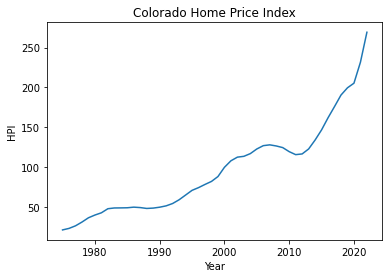

In [30]:
# visualize HPI example
state_id = 5
state_df = df['HPI with 2000 base'].loc[df.State == states[state_id]]
plt.plot(state_df);
plt.title(states[state_id] + " Home Price Index")
plt.xlabel('Year')
plt.ylabel('HPI');

In [83]:
def fit_and_plot_ARIMA(state_id):
    # filter to relevant state
    state_df = df['HPI with 2000 base'].loc[df.State == states[state_id]]
    
    # suppress warning cuz I lazy
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model = ARIMA(state_df, order=(2,1,2))
        results = model.fit()
    
    # plot results
    fig, ax = plt.subplots()
    state_df.plot(ax=ax)
    plot_predict(results,'2022','2030', ax=ax)
    plt.title(states[state_id] + " Home Price Index");

C:\Users\Tech_\AppData\Local\Temp\ipykernel_3924\1034710637.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


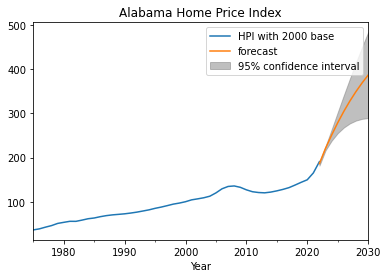

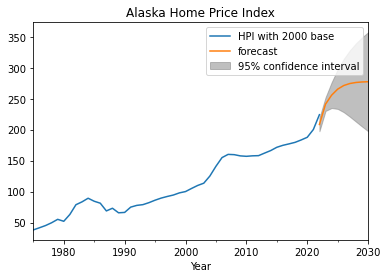

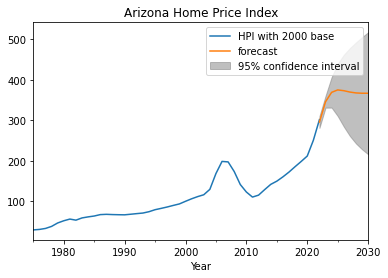

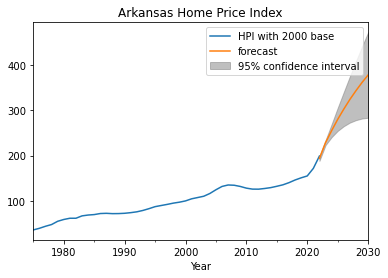

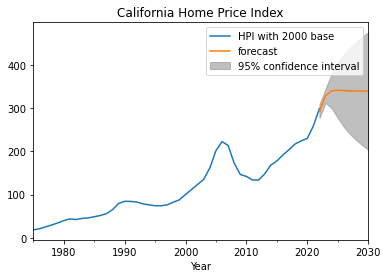

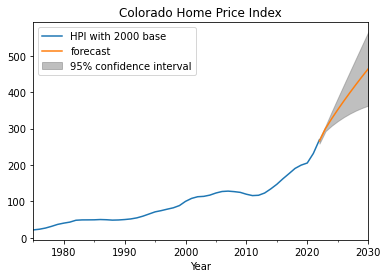

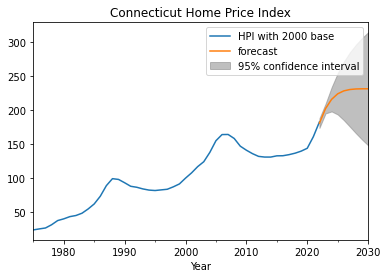

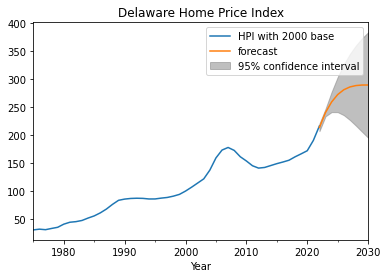

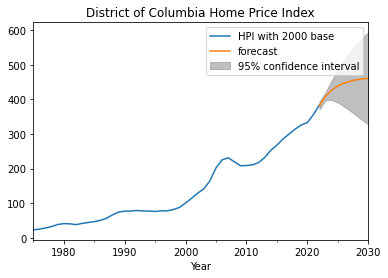

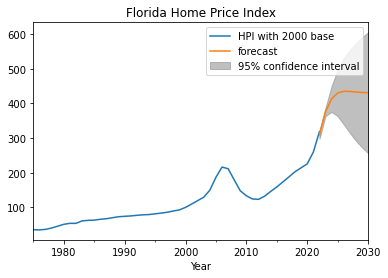

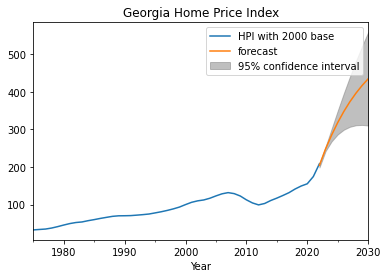

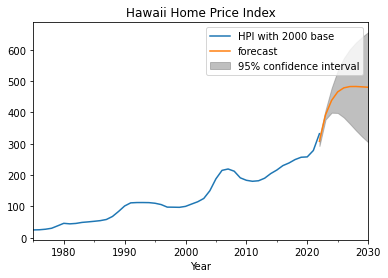

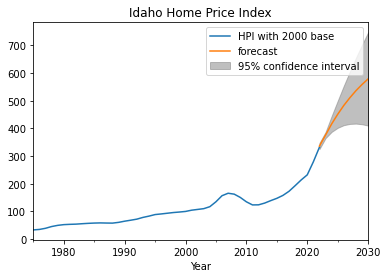

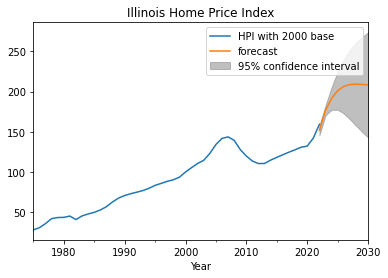

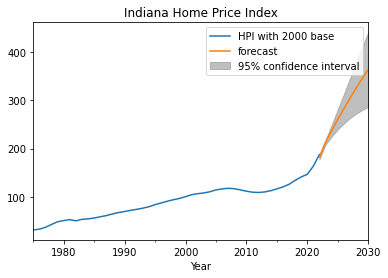

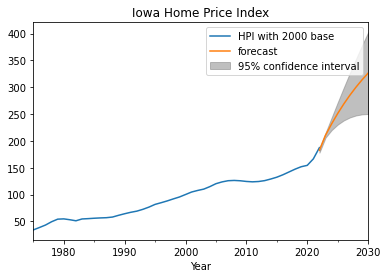

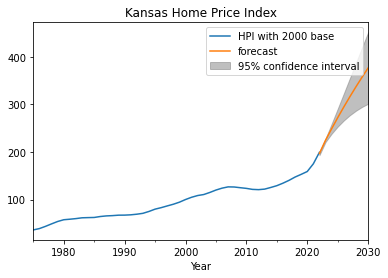

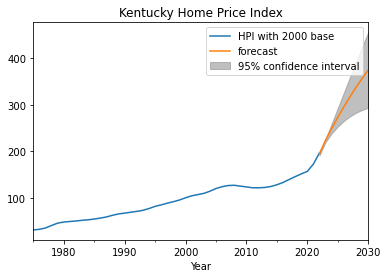

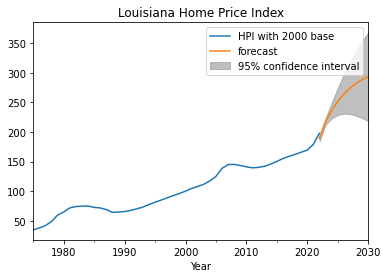

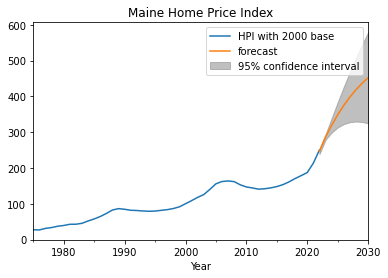

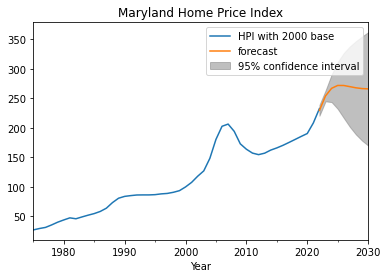

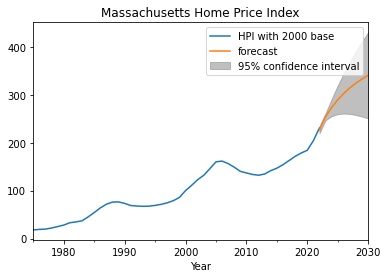

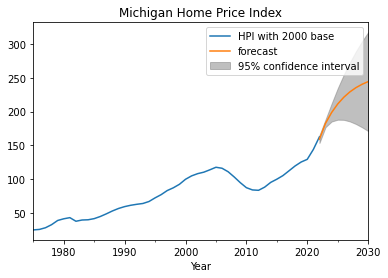

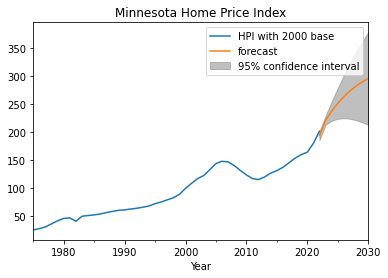

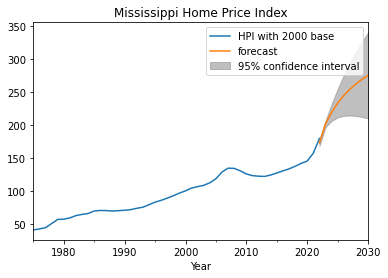

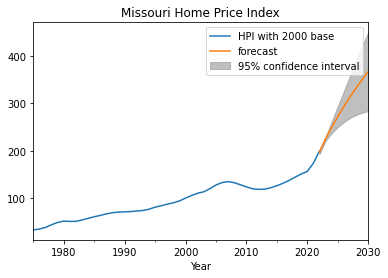

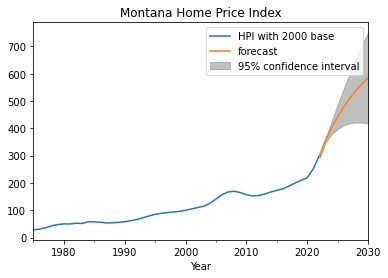

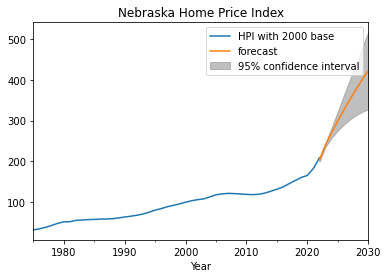

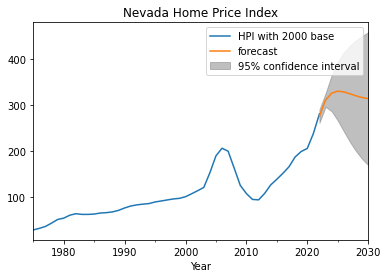

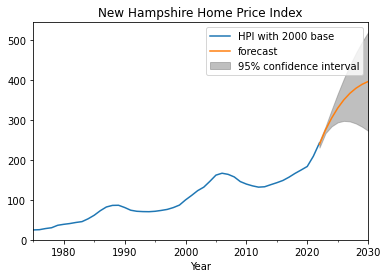

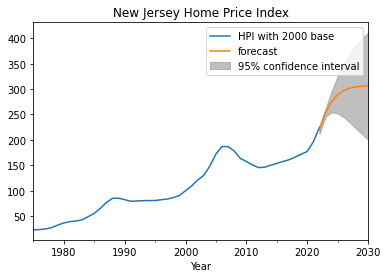

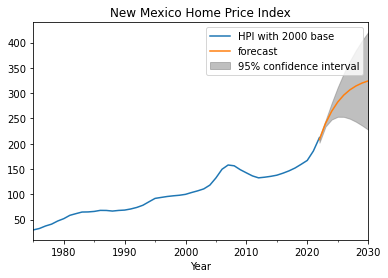

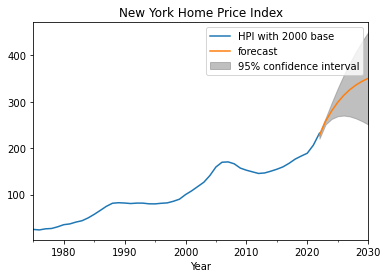

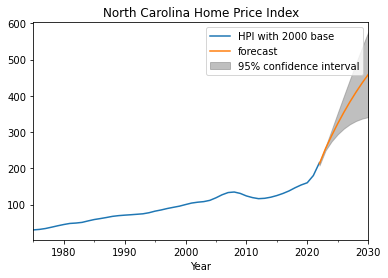

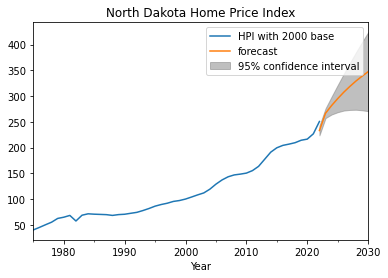

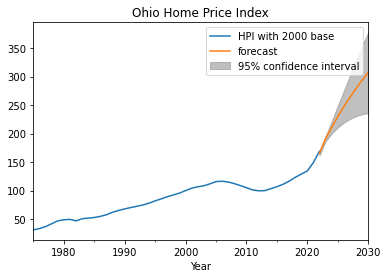

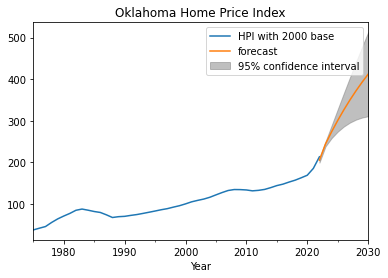

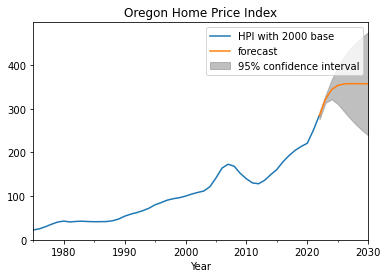

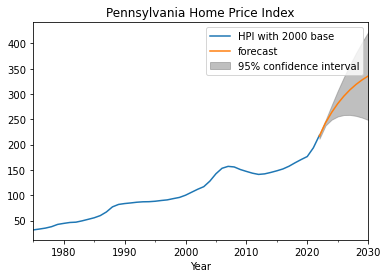

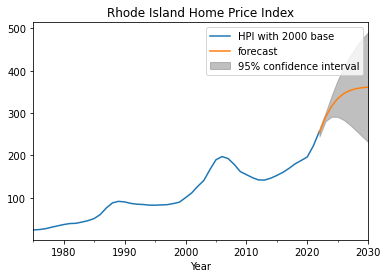

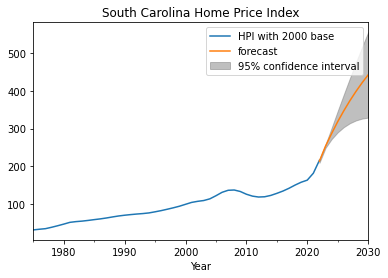

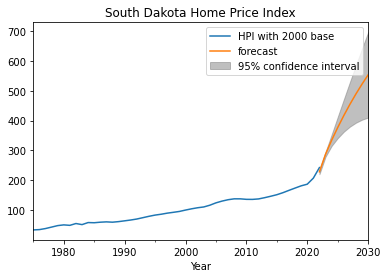

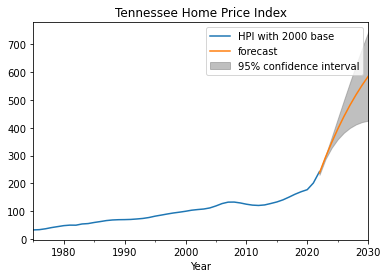

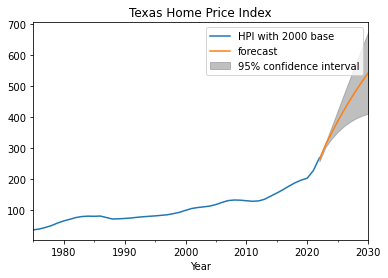

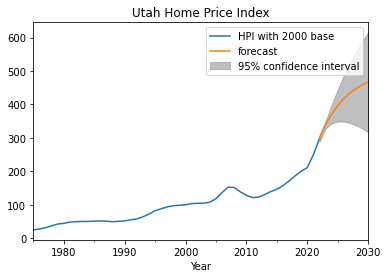

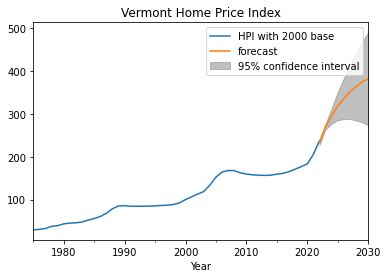

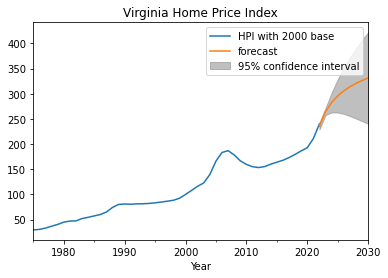

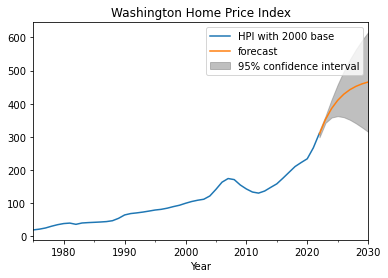

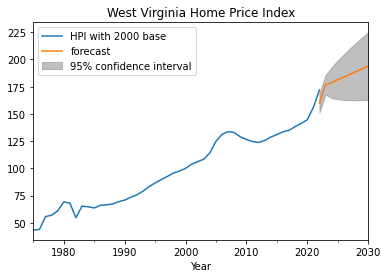

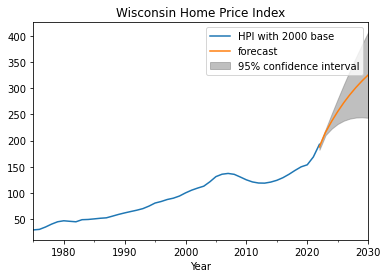

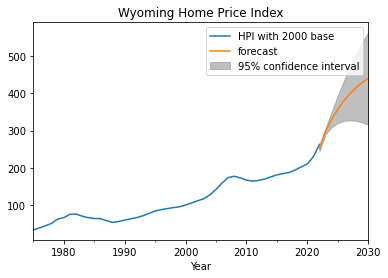

In [84]:
for i in range(len(states)):
    fit_and_plot_ARIMA(i)